In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, neighbors
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import joblib
from joblib import dump, load
import tensorflow as tf
from keras import models, layers
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.cifar10
print(mnist.load_data())

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

((array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
      

In [4]:
# image_list_test=[]
# image_list_train=[]
# for image in os.listdir("train/train"):
#     path=os.path.join("train/train",image)
#     img2=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#     img2=img2/255.0
#     image_list_train.append(img2)

# for image in os.listdir("test/test"):
#     path=os.path.join("test/test",image)
#     img2=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#     img2=img2/255.0
#     image_list_test.append(img2)

# image_list_train=np.array(image_list_train)
# image_list_test=np.array(image_list_test)

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test,  y_test, verbose=2)
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.3632 - loss: 1.7326
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5852 - loss: 1.1628
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6605 - loss: 0.9746
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6934 - loss: 0.8669
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7241 - loss: 0.7809
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7466 - loss: 0.7252
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7674 - loss: 0.6627
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7778 - loss: 0.6282
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7925 - loss: 0.5839
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.8058 - loss: 0.5519
313/313 - 4s - 14ms/step - accuracy: 0.7180 - loss: 0.8477


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.51176929e-05, 7.76050147e-05, 1.12392544e-03, 8.52444649e-01,
        1.46258011e-04, 1.20913506e-01, 1.46466075e-02, 2.70691562e-05,
        1.05085270e-02, 6.68039429e-05],
       [6.90212357e-04, 3.46939951e-01, 2.79540927e-06, 1.34883351e-07,
        1.25454306e-07, 2.65560320e-08, 4.10851754e-07, 2.47839811e-08,
        6.51604652e-01, 7.61597301e-04],
       [2.46396974e-01, 1.23476006e-01, 1.10022100e-02, 1.01587074e-02,
        7.87208881e-03, 7.89528806e-03, 5.00471622e-04, 5.12891868e-03,
        5.41366756e-01, 4.62025665e-02],
       [8.21949899e-01, 1.08122062e-02, 2.12358385e-02, 7.51348678e-03,
        9.50406026e-03, 2.87407078e-04, 2.89780059e-04, 7.51954713e-06,
        1.24856852e-01, 3.54291126e-03],
       [1.27585363e-05, 1.78731995e-07, 3.65079730e-03, 6.28056005e-02,
        3.31038743e-01, 9.42999264e-04, 6.01544321e-01, 5.06692572e-07,
        3.55810380e-06, 5.36672587e-07]], dtype=float32)>

In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

#Look at Ollama (Done)
#Look at 3Blue1Brown (Done)
#Look at Data Augmentation (Done)
#Look at Streamlit

313/313 - 4s - 12ms/step - accuracy: 0.7180 - loss: 0.8477

Test accuracy: 0.7179999947547913


In [14]:
model.save('TensorflowCIFAR.keras')

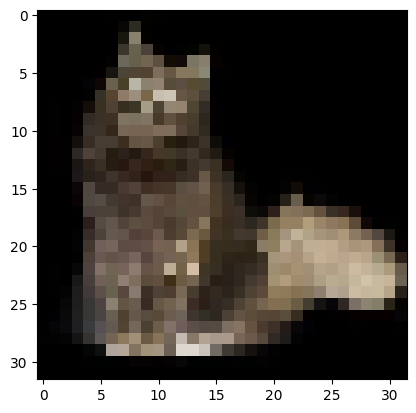

In [9]:
%matplotlib inline
cat=cv2.imread("cat.jpg")
cat=cv2.resize(cat,(32,32))
cat=cv2.bitwise_not(cat)
plt.imshow(cat,cmap="grey")

In [10]:
def plot_image(i, predictions_array, true_label, img):
  #true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


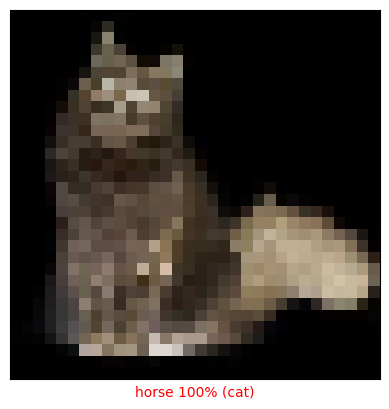

In [ ]:
cat2=np.array([cat])
print(cat2.shape)
predictions = probability_model.predict(cat2)
plot_image(0, predictions[0], 3, cat2[0])